<a id =0></a>
### Table of Contents

* [Basic Overview 📺](#2)

* [Exploratory Data Analysis 📊](#3)

* [Modelling and PreProcessing🐱‍🏍](#4)

  * [Bidirectional LSTM](#4.1)
  * [Bidirectional GRU](#4.2)

### Problem Statement

An insincere question is defined as a question intended to make a statement rather than look for helpful answers. Some characteristics that can signify that a question is insincere:

* Has a non-neutral tone
    *         Has an exaggerated tone to underscore a point about a group of people
    *         Is rhetorical and meant to imply a statement about a group of people
     
* Is disparaging or inflammatory
     * Suggests a discriminatory idea against a protected class of people, or seeks confirmation of a stereotype
     * Makes disparaging attacks/insults against a specific person or group of people
     * Based on an outlandish premise about a group of people
     * Disparages against a characteristic that is not fixable and not measurable
     
* Isn't grounded in reality
     * Based on false information, or contains absurd assumptions
     
* Uses sexual content (incest, bestiality, pedophilia) for shock value, and not to seek genuine answers

[Navigate to Top](#0)
<a id = 2></a>
### Basic Overview 📺

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
import nltk

In [2]:
df_train = pd.read_csv("../input/quora-insincere-questions-classification/train.csv")
df_test = pd.read_csv("../input/quora-insincere-questions-classification/test.csv")
sample = pd.read_csv("../input/quora-insincere-questions-classification/sample_submission.csv")

In [3]:
df_train1 = df_train.copy( ) # For Visualization purpose

In [4]:
print("***** Shape of Training dataset is *****", df_train.shape)
print()
df_train.head()

***** Shape of Training dataset is ***** (1306122, 3)



,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
print("***** Shape of Test Dataset *****",df_test.shape)
print()
df_test.head()

***** Shape of Test Dataset ***** (375806, 2)



,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


In [8]:
corpus = " "
for i in range(0,100):
    
    corpus += " |||| "+ df_train['question_text'][i]
    
print("***** First five sentences in training dataset *****")
print()
print(corpus)

***** First five sentences in training dataset *****

  |||| How did Quebec nationalists see their province as a nation in the 1960s? |||| Do you have an adopted dog, how would you encourage people to adopt and not shop? |||| Why does velocity affect time? Does velocity affect space geometry? |||| How did Otto von Guericke used the Magdeburg hemispheres? |||| Can I convert montra helicon D to a mountain bike by just changing the tyres? |||| Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians? |||| Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views? |||| Is it crazy if I wash or wipe my groceries off? Germs are everywhere. |||| Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly? |||| Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have som

[Navigate to Top](#0)
<a id =3></a>
### Exploratory Data Analysis 📊

In [10]:
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=10)

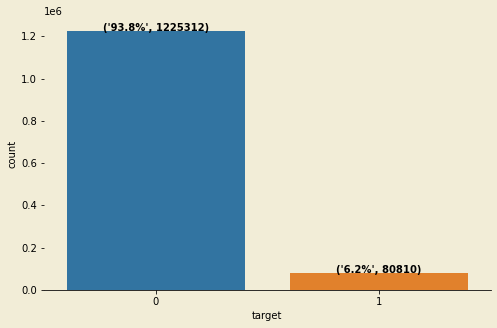

In [11]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='x',color='gray')

a=sns.countplot(data=df_train,x='target')
without_hue(df_train,'target',a)

In [12]:
def length(text):
    length = len(text.split(" "))
    return(length)

df_train1['length'] = df_train1['question_text'].apply(length)

df_train1.head()

,qid,question_text,target,length
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15


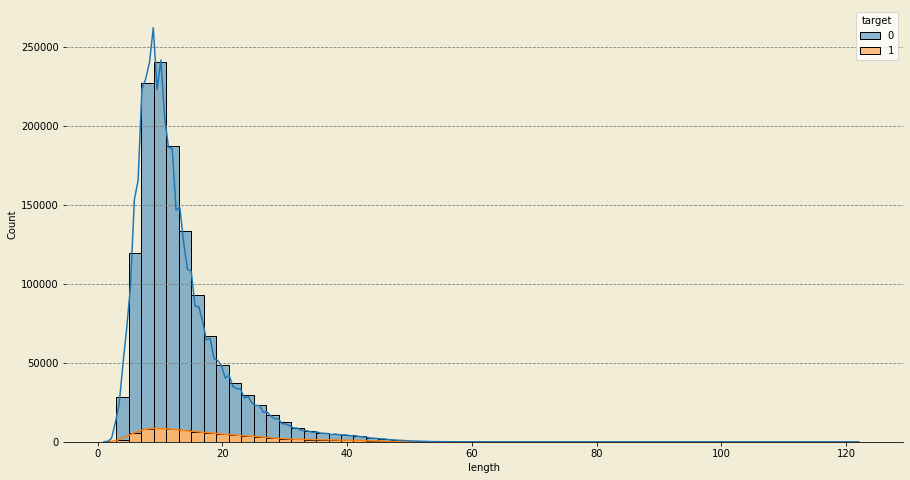

In [13]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

a=sns.histplot(data=df_train1,x='length',hue='target',kde=True,binwidth=2,multiple='stack')


In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def remove_stopwords(text):
    text = str(text).lower()
    text = text.split(" ")
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text if i not in set(stopwords.words('english'))]
    text = " ".join(text)
    return(text)
    

df_train1['question_text'] = df_train1['question_text'].apply(remove_stopwords)





In [10]:
df_train_sin = df_train1.loc[df_train1['target']==0]
df_train_insin = df_train1.loc[df_train1['target']==1]


In [11]:
df_train_sin.head()

,qid,question_text,target
0,00002165364db923c7e6,quebec nationalist see province nation 1960s?,0
1,000032939017120e6e44,"adopted dog, would encourage people adopt shop?",0
2,0000412ca6e4628ce2cf,velocity affect time? velocity affect space ge...,0
3,000042bf85aa498cd78e,otto von guericke used magdeburg hemispheres?,0
4,0000455dfa3e01eae3af,convert montra helicon mountain bike changing ...,0


In [12]:
df_train_insin.head()

,qid,question_text,target
22,0000e91571b60c2fb487,united state become largest dictatorship world?,1
30,00013ceca3f624b09f42,baby sweeter parents? dark skin baby light ski...,1
110,0004a7fcb2bf73076489,black support school choice mandatory sentenci...,1
114,00052793eaa287aff1e1,"gay boy love cousin (boy). sexy, dont know do....",1
115,000537213b01fd77b58a,race smallest penis?,1


In [13]:
def get_count(dataframe):
    dic = {}
    for i in dataframe['question_text']:
        for j in i.split(" "):
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1
            
    dic = sorted(dic.items() , key = lambda x:x[1],reverse=True)
    return(dic)


dic_sin = get_count(df_train_sin)
dic_insin = get_count(df_train_insin)


In [14]:
dic_sin_top = []
dic_sin_topcount = []
dic_insin_top = []
dic_insin_topcount = []

count = 0
for i in dic_sin:
    if(count<50):
        dic_sin_top.append(i[0])
        dic_sin_topcount.append(i[1])
    else:
        break
        
for i in dic_insin:
    if(count<50):
        dic_insin_top.append(i[0])
        dic_insin_topcount.append(i[1])
    else:
        break

        
        


Text(0.5, 1.0, 'Top words used in insincere questions')

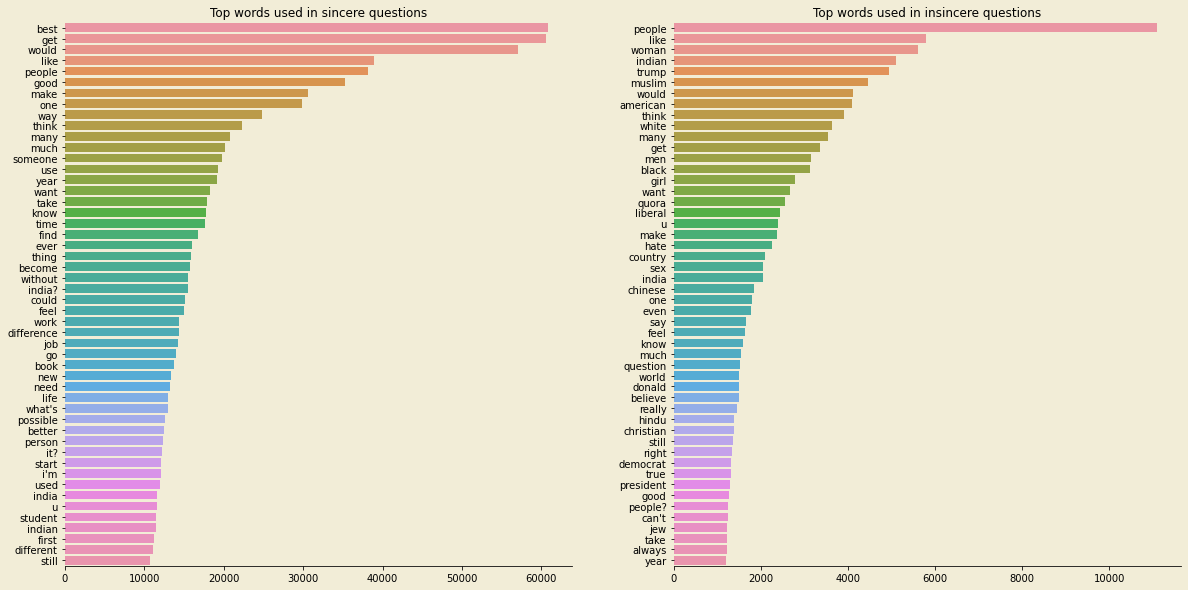

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
fig.patch.set_facecolor('#F2EDD7FF')

for i in range(0,2):
    ax[i].set_facecolor('#F2EDD7FF')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].grid(linestyle="--",axis='y',color='gray')

    

sns.barplot(y=dic_sin_top[0:50],x=dic_sin_topcount[0:50],ax=ax[0])
sns.barplot(y=dic_insin_top[0:50],x=dic_insin_topcount[0:50],ax=ax[1])
ax[0].set_title("Top words used in sincere questions")
ax[1].set_title("Top words used in insincere questions")

In [16]:
from nltk import ngrams

def getting_bigrams(dataframe):
    
    dic = {}
    for i in dataframe['question_text']:
        bigrams = ngrams(i.split(" "),2)
        for j in bigrams:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1
                
    dic = sorted(dic.items(),key= lambda x:x[1],reverse=True)
    
    return(dic)
    
dic_sin_bigrams = getting_bigrams(df_train_sin)
dic_insin_bigrams = getting_bigrams(df_train_insin)

In [17]:
dic_sin_topbigrams = []
dic_sin_topcountbigrams = []
dic_insin_topbigrams = []
dic_insin_topcountbigrams = []

count = 0
for i in dic_sin_bigrams:
    count+=1
    if(count<50):
        dic_sin_topbigrams.append(i[0])
        dic_sin_topcountbigrams.append(i[1])
    else:
        break

count1 = 0
for i in dic_insin_bigrams:
    count1+=1
    if(count1<50):
        dic_insin_topbigrams.append(i[0])
        dic_insin_topcountbigrams.append(i[1])
    else:
        break


In [18]:
for i in range(0,len(dic_sin_topbigrams)):
    dic_insin_topbigrams[i] = ' '.join(dic_insin_topbigrams[i])
    dic_sin_topbigrams[i] = ' '.join(dic_sin_topbigrams[i])

Text(0.5, 1.0, 'Top bigrams used in insincere questions')

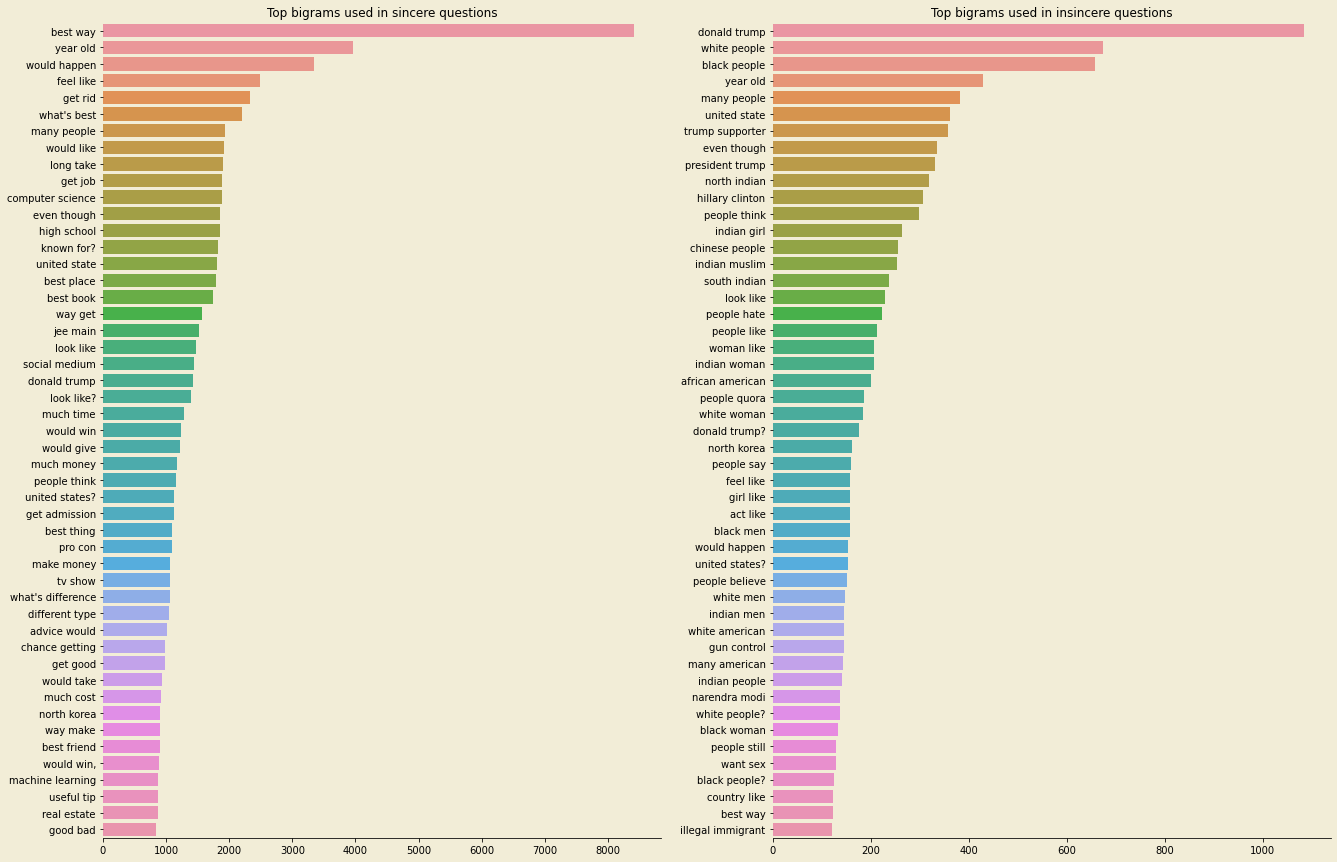

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(22,15))
fig.patch.set_facecolor('#F2EDD7FF')

for i in range(0,2):
    ax[i].set_facecolor('#F2EDD7FF')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].grid(linestyle="--",axis='y',color='gray')

    

sns.barplot(y=dic_sin_topbigrams[0:50],x=dic_sin_topcountbigrams[0:50],ax=ax[0])
sns.barplot(y=dic_insin_topbigrams[0:50],x=dic_insin_topcountbigrams[0:50],ax=ax[1])
ax[0].set_title("Top bigrams used in sincere questions")
ax[1].set_title("Top bigrams used in insincere questions")

In [20]:
from wordcloud import WordCloud

df_sin_para = " ".join([word for word in df_train_sin['question_text']])
df_insin_para = " ".join([word for word in df_train_insin['question_text']])


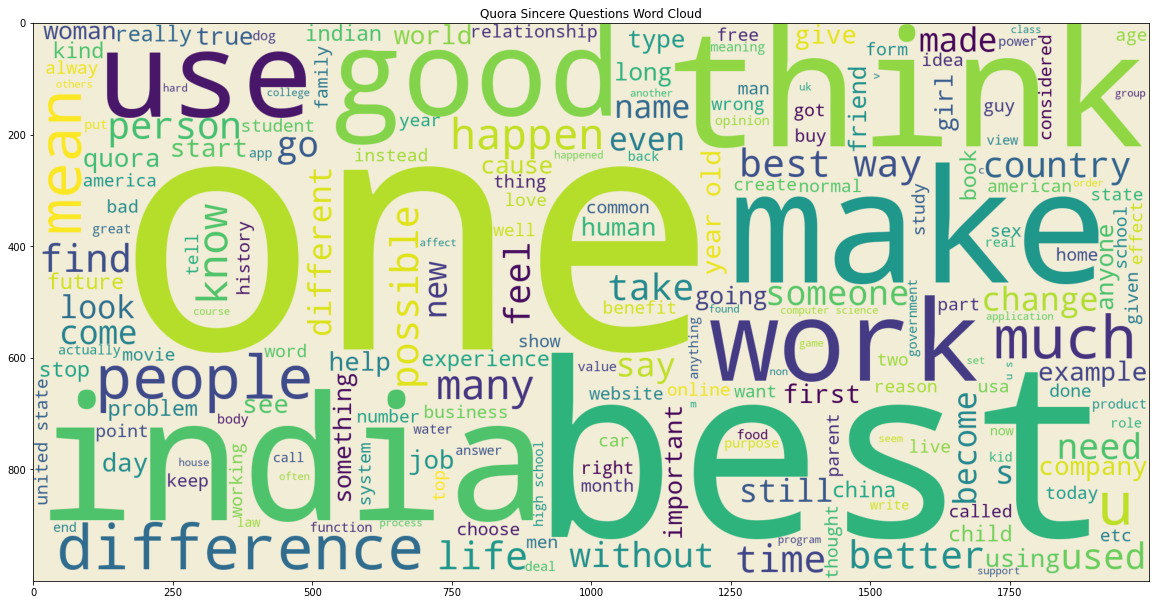

In [21]:
wordcloud=WordCloud(width=2000,height=1000,background_color='#F2EDD7FF').generate(df_sin_para)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Quora Sincere Questions Word Cloud")
plt.show()

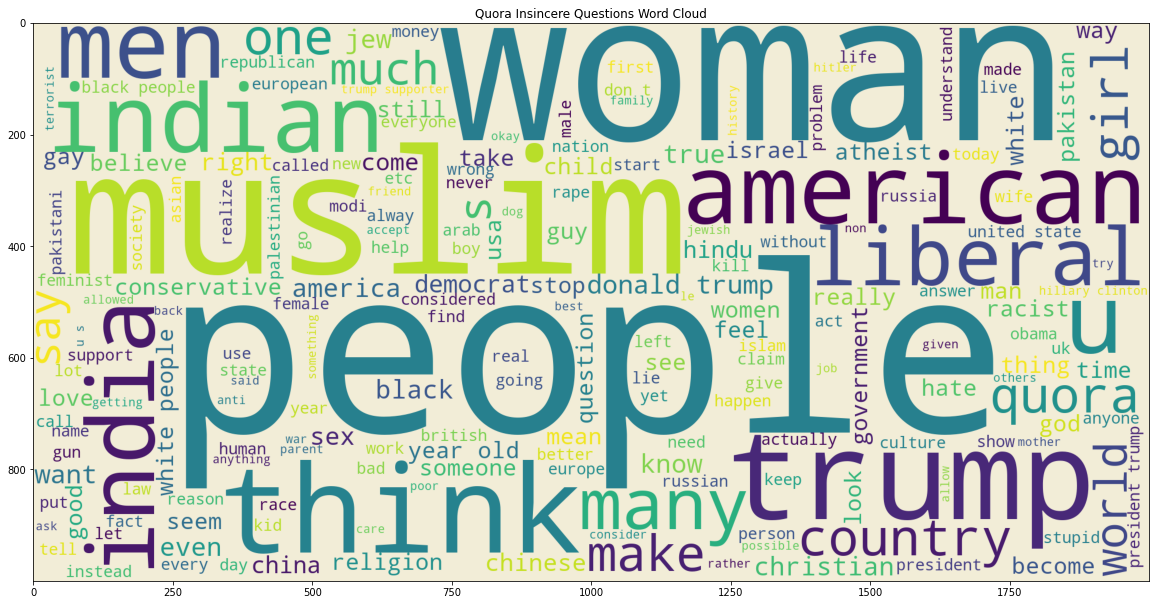

In [22]:
wordcloud=WordCloud(width=2000,height=1000,background_color='#F2EDD7FF').generate(df_insin_para)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Quora Insincere Questions Word Cloud")
plt.show()

[Navigate To Top](#0)
<a id =4></a>
### Modelling and Preprocessing 🐱‍🏍

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM , RNN , Dense , Flatten , Embedding , Bidirectional , SimpleRNN , Dropout , GlobalMaxPool1D , GRU
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , f1_score , roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau

In [4]:
train , val = train_test_split(df_train,test_size=0.2,random_state=42)

dimension_size = 300
vocabulary_size = 50000
max_length = 100

train_X = train['question_text']
val_X = val['question_text']
test_X = df_test['question_text']

tokenizer = Tokenizer(num_words=vocabulary_size)  #Initiating Tokenizer

fit_text = list(train['question_text']) #getting list of train text
tokenizer.fit_on_texts(fit_text) #fitting on text

train_X = tokenizer.texts_to_sequences(train_X) #Converting tokens of texts into sequence of integers
val_X = tokenizer.texts_to_sequences(val_X)
test_X = tokenizer.texts_to_sequences(test_X)


train_X = pad_sequences(train_X, maxlen=max_length) #Padding the text to make length of each text uniform
val_X = pad_sequences(val_X, maxlen=max_length)
test_X = pad_sequences(test_X, maxlen=max_length)

train_Y = train['target']
val_Y = val['target']

In [5]:
print(len(tokenizer.word_index))

196192


In [6]:
glove_embedded = "../input/glove6b300dtxt/glove.6B.300d.txt" ##"../input/glove840b300dtxt/glove.840B.300d.txt"


def getting_glove_embedding(filename):  #Getting glove embedding in a dictionary
    file = open(filename,'r')
    lines = file.readlines()
    embedding = dict()
    for line in lines:
        parts = line.split()
        embedding[parts[0]] = np.asarray(parts[1:],dtype='float32')
        
    return(embedding)
    

def embedding_weights(vocab,raw_embedding):  #raw_embedding = getting_glove_embedding(filename)
    
    vocab_size = len(vocab)+1
    weight_matrix = np.zeros((vocab_size,300)) #each word with 300 dimensions
    
    for word , i in vocab.items():
        vector = raw_embedding.get(word)
        if vector is not None:
            weight_matrix[i] = vector
            
    return(weight_matrix)
            
        
raw_embedding = getting_glove_embedding(glove_embedded)
print("<<<<<<< Raw Embedding Loaded >>>>>>>")
embedding_vectors = embedding_weights(tokenizer.word_index,raw_embedding)


<<<<<<< Raw Embedding Loaded >>>>>>>


In [7]:
embedding_vectors.shape

(196193, 300)

[Navigate To Top](#0)
<a id =4.1></a>
#### Bidirectional LSTM

In [14]:
embedding_layer = Embedding(len(tokenizer.word_index)+1,300,weights=[embedding_vectors])
model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         58857900  
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         186880    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 59,046,861
Trainable params: 59,046,861
Non-trainable params: 0
__________________________________________

In [15]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_acc', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)


history=model.fit(train_X,train_Y,validation_data=(val_X,val_Y),epochs=5,batch_size=512,callbacks=[checkpoint,reduce_lr])

Epoch 1/5


2022-07-24 08:43:12.214116: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2041/2041 [==============================] - 106s 50ms/step - loss: 0.1255 - accuracy: 0.9486 - val_loss: 0.1026 - val_accuracy: 0.9594
Epoch 2/5
2041/2041 [==============================] - 101s 50ms/step - loss: 0.0997 - accuracy: 0.9589 - val_loss: 0.1021 - val_accuracy: 0.9600
Epoch 3/5
2041/2041 [==============================] - 101s 50ms/step - loss: 0.0869 - accuracy: 0.9659 - val_loss: 0.1050 - val_accuracy: 0.9590
Epoch 4/5
2041/2041 [==============================] - 106s 52ms/step - loss: 0.0728 - accuracy: 0.9713 - val_loss: 0.1162 - val_accuracy: 0.9569
Epoch 5/5
2041/2041 [==============================] - 102s 50ms/step - loss: 0.0589 - accuracy: 0.9767 - val_loss: 0.1324 - val_accuracy: 0.9545


In [28]:
pred_val = model.predict(val_X,batch_size=512,verbose=1).squeeze()

for thresh in np.arange(0.1,0.501,0.01):
    thresh = np.round(thresh,2)
    print("**** F1 Score with "+str(thresh)+" value **** ",f1_score(val_Y,(pred_val>thresh).astype(int)))
    print(" ***** AUC Score with "+str(thresh)+" value **** ",roc_auc_score(val_Y,(pred_val>thresh).astype(int)))
    print()

511/511 [==============================] - 5s 10ms/step
**** F1 Score with 0.1 value ****  0.5878957337422207
 ***** AUC Score with 0.1 value ****  0.879579250866461

**** F1 Score with 0.11 value ****  0.5924790704057825
 ***** AUC Score with 0.11 value ****  0.8780094497463958

**** F1 Score with 0.12 value ****  0.5968654363349717
 ***** AUC Score with 0.12 value ****  0.8765514170570318

**** F1 Score with 0.13 value ****  0.600789584997885
 ***** AUC Score with 0.13 value ****  0.8747413668751516

**** F1 Score with 0.14 value ****  0.6037870498120748
 ***** AUC Score with 0.14 value ****  0.872704261710628

**** F1 Score with 0.15 value ****  0.6071651839384468
 ***** AUC Score with 0.15 value ****  0.871435021624117

**** F1 Score with 0.16 value ****  0.6101629075724101
 ***** AUC Score with 0.16 value ****  0.8702378651751503

**** F1 Score with 0.17 value ****  0.612439018410924
 ***** AUC Score with 0.17 value ****  0.8685310222124769

**** F1 Score with 0.18 value ****  0.6

In [29]:
preds_test = model.predict(test_X,batch_size=512,verbose=1).squeeze()

734/734 [==============================] - 8s 10ms/step


In [30]:
submission= pd.DataFrame({'qid':df_test['qid'],'prediction': preds_test})

In [31]:
submission.to_csv("Submission1.csv",index=False)

[Navigate To Top](#0)
<a id =4.2></a>
#### Bidirectional GRU

In [34]:
embedding_layer = Embedding(len(tokenizer.word_index)+1,300,weights=[embedding_vectors])
model = Sequential()
model.add(embedding_layer)
model.add(Bidirectional(GRU(64,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 300)         58857900  
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         140544    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 59,000,525
Trainable params: 59,000,525
Non-trainable params: 0
__________________________________________

In [35]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_acc', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)


history=model.fit(train_X,train_Y,validation_data=(val_X,val_Y),epochs=5,batch_size=512,callbacks=[checkpoint,reduce_lr])

Epoch 1/5
2041/2041 [==============================] - 103s 49ms/step - loss: 0.1196 - accuracy: 0.9509 - val_loss: 0.1024 - val_accuracy: 0.9599
Epoch 2/5
2041/2041 [==============================] - 100s 49ms/step - loss: 0.0983 - accuracy: 0.9611 - val_loss: 0.1019 - val_accuracy: 0.9601
Epoch 3/5
2041/2041 [==============================] - 100s 49ms/step - loss: 0.0855 - accuracy: 0.9663 - val_loss: 0.1074 - val_accuracy: 0.9597
Epoch 4/5
2041/2041 [==============================] - 100s 49ms/step - loss: 0.0723 - accuracy: 0.9715 - val_loss: 0.1166 - val_accuracy: 0.9578
Epoch 5/5
2041/2041 [==============================] - 100s 49ms/step - loss: 0.0593 - accuracy: 0.9766 - val_loss: 0.1342 - val_accuracy: 0.9570


In [37]:
pred_val = model.predict(val_X,batch_size=512,verbose=1).squeeze()

for thresh in np.arange(0.1,0.501,0.01):
    thresh = np.round(thresh,2)
    print("**** F1 Score with "+str(thresh)+" value **** ",f1_score(val_Y,(pred_val>thresh).astype(int)))
    print(" ***** AUC Score with "+str(thresh)+" value **** ",roc_auc_score(val_Y,(pred_val>thresh).astype(int)))
    print()

511/511 [==============================] - 5s 10ms/step
**** F1 Score with 0.1 value ****  0.6157890857269219
 ***** AUC Score with 0.1 value ****  0.8700613570163208

**** F1 Score with 0.11 value ****  0.6196825712722026
 ***** AUC Score with 0.11 value ****  0.8685308304668371

**** F1 Score with 0.12 value ****  0.6223374792285613
 ***** AUC Score with 0.12 value ****  0.8662860801961736

**** F1 Score with 0.13 value ****  0.6240492483020019
 ***** AUC Score with 0.13 value ****  0.8639932890321464

**** F1 Score with 0.14 value ****  0.6265710540519701
 ***** AUC Score with 0.14 value ****  0.8622315294499158

**** F1 Score with 0.15 value ****  0.6278985319292422
 ***** AUC Score with 0.15 value ****  0.8600972723472284

**** F1 Score with 0.16 value ****  0.6298932384341637
 ***** AUC Score with 0.16 value ****  0.858503165411049

**** F1 Score with 0.17 value ****  0.6321878549354183
 ***** AUC Score with 0.17 value ****  0.8569142041207657

**** F1 Score with 0.18 value **** 

In [38]:
preds_test = model.predict(test_X,batch_size=512,verbose=1).squeeze()

734/734 [==============================] - 7s 10ms/step


In [39]:
submission= pd.DataFrame({'qid':df_test['qid'],'prediction': preds_test})

In [40]:
submission.to_csv("Submission_GRU.csv",index=False)

In [41]:
model.save("Quora_Insincere.h5")

##### Thank You for scrolling this down in my notebook . I would love to get your feeback and suggestions if any ☺.

##### This dataset excites because it is related to find out toxic and harmful content on social media which can trigger chaos and disputes . I have given my little contribution to this dataset 🚀.